# Homework 8

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
import math
from scipy import stats
from scipy.stats import norm

Q1) (30 points) In this question, we will verify whether the Central Limit Theorem is correct or not for our data
set. Generate 5 million random numbers in [1, 10] using “np.randint”. Using np.choice() method, draw 100,000
samples, each of size 50, without replacement. Plot the histogram for your original population and calculate µ
and σ. For each sample, calculate 𝑥̅. You will have 100,000 values. Plot the histogram for these values and
calculate the mean and standard deviation for them. Is the mean equal to µ? Is the standard deviation equal to
σ/sqrt(50)? In your plots, replace the ‘??’ with your calculations.

In [2]:
random_number_list = np.random.randint(1,11,5000000)

In [3]:
hist_std_dev = random_number_list.std()
hist_mean = random_number_list.mean()
print(hist_std_dev)
print(hist_mean)

2.872607965849228
5.4989634


Text(0.5, 0, 'Mean = 5.4989634       std = 2.872607965849228')

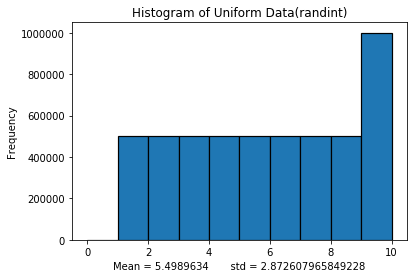

In [4]:
plt.hist(random_number_list, range = (0,10), linewidth = 1.2, edgecolor = 'black')
#plt.ylim(0,525000)
plt.title("Histogram of Uniform Data(randint)")
plt.ylabel("Frequency")
plt.xlabel("Mean = {}       std = {}".format(hist_mean, hist_std_dev))

In [5]:
sample = random.choice(a=random_number_list, size=(100000, 50), replace=False)
print(sample)

samples_means = np.mean(sample, axis=1)
print(samples_means)

[[ 8  5  5 ...  2  4  9]
 [ 6  5  8 ... 10  1  1]
 [ 3 10  4 ...  5  3  4]
 ...
 [ 7  2  2 ...  7  1  5]
 [ 4  4  1 ...  3  8  5]
 [ 5  3  5 ...  3  3  4]]
[6.02 5.6  5.44 ... 5.56 5.66 5.6 ]


In [6]:
sample_std_dev = samples_means.std()
sample_mean = samples_means.mean()
print(sample_std_dev)
print(sample_mean)

0.4053166878632559
5.498963400000001


Text(0.5, 0, 'Mean = 5.498963400000001       std = 0.4053166878632559')

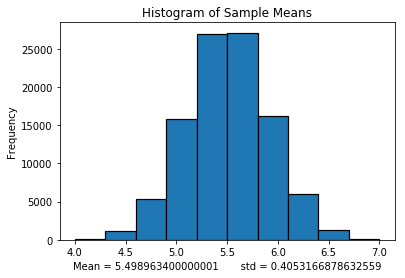

In [7]:
plt.hist(samples_means, range = (4.0,7.0), linewidth = 1.2, edgecolor = 'black')
plt.title("Histogram of Sample Means")
plt.ylabel("Frequency")
plt.xlabel("Mean = {}       std = {}".format(sample_mean, sample_std_dev))

In [8]:
std_dev_calc = hist_std_dev/math.sqrt(50)
print(std_dev_calc)

0.4062481144684967


Mean is equal to µ, but the standard deviation is not exactly a match for σ/sqrt(50)

Q2) (15 points) Convert the sample means to standard score (z) and plot it.

Text(0.5, 1.0, 'Histogram of Standard Score z')

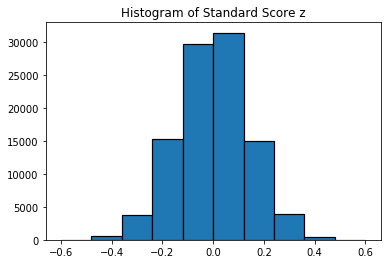

In [9]:
zscore = [((i - hist_mean)/hist_std_dev) for i in samples_means]
plt.hist(zscore, range = (-0.6,0.6), linewidth = 1.2, edgecolor = 'black')
plt.title("Histogram of Standard Score z")

Q3) (15 points) Write your own function to plot the normal distribution curve for sample means from Q1. Don’t
use any built-in function that can be used to generate/plot the normal curve in red. You may use f(x) below to
generate the curve. 

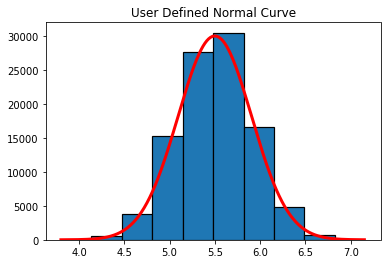

In [10]:
def normal(xList, mean, std):
    y = np.zeros_like(xList)
    cntr=0
    for i in xList:
        v = std*std
        ex = math.exp(-(i-mean)**2/(2*v))
        d = math.sqrt(2 * math.pi) * std
        y[cntr] = ex/d
        cntr+=1
    return y


d = plt.hist(samples_means, linewidth = 1.2, edgecolor = 'black')

x = d[1]    #getting x values
x = np.arange(x[0], x[-1], 0.01)    #refine x values...adding more values
normal_distribution_curve = normal(x, sample_mean, sample_std_dev)
maxFreq = d[0].max()
normal_distribution_curve *= maxFreq  #re-scaling
plt.plot(x,normal_distribution_curve, linewidth=3, color='red')
plt.title("User Defined Normal Curve")
plt.show()

Q4) (40 points) Create a standard normal distribution (mean=0, Std Deviation=1) curve in python and then
shade area to the left, right or the middle of z-score(s) based on the input from the user. The user will provide
the input as a sequence of 2 or 3 space-separated string. The first character is either (<, >, or =). The second and
third inputs are actually numerical. The only case the program accepts 3 inputs is when the first character is ‘=’.
The first character defines which area to shade under the curve. If < is used, then your program will shade the
area left to the provided number after <. If > is used, your program will shade the area right to the provided
number. If = is used, your program expects two numbers to shade the area in-between. The numbers are given
in increasing value. Thus, first number is used as the lower limit of the area to shade and the second number is
used as an upper limit. Calculate the probability (P) for the shaded area and add it as a text into the plot. To
shade the area, you may use plt.fill_between() method. This method fills the area between two given horizontal
curves. To draw the curve for the standard normal distribution, use the user-defined function you wrote in Q3.
Where x is a np.arange(-3,3,0.01).

Enter your input: < 0.5


Text(0.95, 0.95, 'P([0.5]) = 0.691')

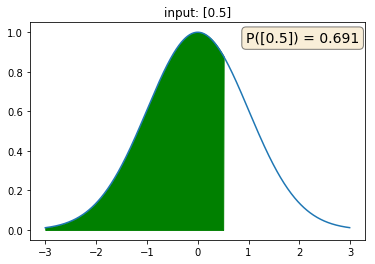

In [27]:
rangeQ4 = np.arange(-3,3,0.01)
Q4Norm = normal(rangeQ4, 0, 1)
Q4Input = input("Enter your input: ")

if Q4Input[0] == "<":
    Q4Input = Q4Input.split(' ')
    Q4Input = [Q4Input[1]]
    Q4Input = np.asarray(Q4Input, dtype=float)
    W = (rangeQ4 < Q4Input)
    probability = round(stats.norm.cdf(Q4Input[0]),3)
if Q4Input[0] == ">":
    Q4Input = Q4Input.split(' ')
    Q4Input = [Q4Input[1]]
    Q4Input = np.asarray(Q4Input, dtype=float)
    W = (rangeQ4 > Q4Input)
    probability = round(stats.norm.cdf(1 - (abs(Q4Input[0]))),3)
if Q4Input[0] == "=":
    Q4Input = Q4Input.split(' ')
    Q4Input = [Q4Input[1], Q4Input[2]]
    Q4Input = np.asarray(Q4Input, dtype=float)
    W = np.logical_and(Q4Input[0] < rangeQ4, rangeQ4 < Q4Input[1])
    probability = round(stats.norm.cdf(abs(Q4Input[0]) - abs(Q4Input[0])),3)
    
def gauss(x, m, s):
    return np.exp(-np.power(x - m, 2.0)/(2 * np.power(s,2)))

y = gauss(rangeQ4, 0, 1)

plt.plot(rangeQ4, y)
plt.fill_between(rangeQ4, y, where = W, interpolate = True, color = 'g')
plt.title('input: {}'.format(Q4Input))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.95, 0.95, 'P({}) = {}'.format(Q4Input,probability), fontsize=14, bbox=props)